# 语言模型

In [2]:
import random
import torch
import My_utils
import re

def read_time_machine():
    with open('./data/time_machine.txt', 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]
# 将每行文本中的非字母字符替换为空格，去除文本两端的空格，转为小写字母

In [9]:
tokens = My_utils.tokenize(read_time_machine())  # 每一行的词汇存在一个list中，因此tokens包含多个list
corpus = [token for line in tokens for token in line]  # 一个很大的list，其中包括这篇文章的没一个词
vocab = My_utils.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2477),
 ('and', 1311),
 ('of', 1285),
 ('i', 1268),
 ('a', 877),
 ('to', 766),
 ('in', 605),
 ('was', 554),
 ('that', 458),
 ('it', 452)]

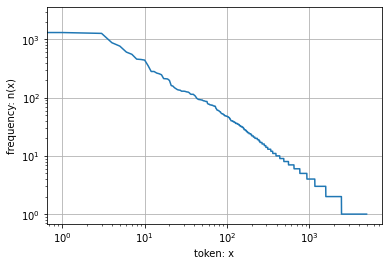

In [4]:
freqs = [freq for token, freq in vocab.token_freqs]
My_utils.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)', xscale='log', yscale='log')

## 二元语法和三元语法

In [6]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = My_utils.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 344),
 (('in', 'the'), 192),
 (('i', 'had'), 130),
 (('and', 'the'), 112),
 (('i', 'was'), 112),
 (('the', 'time'), 110),
 (('to', 'the'), 101),
 (('it', 'was'), 99),
 (('project', 'gutenberg'), 88),
 (('as', 'i'), 78)]

In [5]:
trigram_tokens = [triple for triple in zip(corpus[:-2], corpus[1: -1], corpus[2:])]
trigram_vocab = My_utils.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 63),
 (('the', 'time', 'machine'), 34),
 (('the', 'project', 'gutenberg'), 33),
 (('the', 'medical', 'man'), 24),
 (('project', 'gutenberg', 'electronic'), 18),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('the', 'united', 'states'), 14),
 (('seemed', 'to', 'me'), 14)]

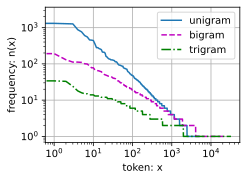

In [7]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
My_utils.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x', ylabel='frequency: n(x)', xscale='log', yscale='log', legend=['unigram', 'bigram', 'trigram'])

In [ ]:
def load_corpus_time_machine(max_tokens=-1):
    lines = read_time_machine()
    tokens = My_utils.tokenize(lines, 'char')
    vocab = My_utils.Vocab(tokens)
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

class SeqDataLoader:
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = My_utils.seq_data_iter_random
        else:
            self.data_iter_fn = My_utils.seq_data_iter_sequential
        self.corpus, self.vocab = load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
        
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

def load_data_time_machine(batch_size, num_steps, use_random_iter=False, max_tokens=10000):
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens)
    return data_iter, data_iter.vocab